In [1]:
import unicodecsv

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments = read_csv('enrollments.csv')
daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')

In [2]:
enrollments[0]

{'account_key': '448',
 'cancel_date': '2015-01-14',
 'days_to_cancel': '65',
 'is_canceled': 'True',
 'is_udacity': 'True',
 'join_date': '2014-11-10',
 'status': 'canceled'}

In [3]:
daily_engagement[0]

{'acct': '0',
 'lessons_completed': '0.0',
 'num_courses_visited': '1.0',
 'projects_completed': '0.0',
 'total_minutes_visited': '11.6793745',
 'utc_date': '2015-01-09'}

In [4]:
project_submissions[0]

{'account_key': '256',
 'assigned_rating': 'UNGRADED',
 'completion_date': '2015-01-16',
 'creation_date': '2015-01-14',
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

In [5]:
from datetime import datetime as dt

def parse_date(date):
    if date=='':
        return None
    else:
        return dt.strptime(date,'%Y-%m-%d')

def parse_maybe_int(i):
    if i=='':
        return None
    else:
        return int(i)

for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel']=parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled']=enrollment['is_canceled']=='True'
    enrollment['is_udacity']=enrollment['is_udacity']=='True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])

enrollments[0]

{'account_key': '448',
 'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 'days_to_cancel': 65,
 'is_canceled': True,
 'is_udacity': True,
 'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 'status': 'canceled'}

In [6]:
for engagement_record in daily_engagement:
    engagement_record['lessons_completed']= int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited']= int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed']= int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited']= float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])


daily_engagement[0]

{'acct': '0',
 'lessons_completed': 0,
 'num_courses_visited': 1,
 'projects_completed': 0,
 'total_minutes_visited': 11.6793745,
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [7]:
for submission in project_submissions:
    submission['completion_date']=parse_date(submission['completion_date'])
    submission['creation_date']=parse_date(submission['creation_date'])

project_submissions[0]

{'account_key': '256',
 'assigned_rating': 'UNGRADED',
 'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

In [8]:
for engagement_record in daily_engagement:
    engagement_record['account_key']=engagement_record['acct']
    del[engagement_record['acct']]
    
daily_engagement[0]

{'account_key': '0',
 'lessons_completed': 0,
 'num_courses_visited': 1,
 'projects_completed': 0,
 'total_minutes_visited': 11.6793745,
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [9]:
def get_unique_students(data):
    unique_students=set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students

In [10]:
len(enrollments)


1640

In [11]:
unique_enrolled_students = get_unique_students(enrollments)
len(unique_enrolled_students)

1302

In [12]:
len(daily_engagement)

136240

In [13]:
unique_engagement_students = get_unique_students(daily_engagement)
len(unique_engagement_students)

1237

In [14]:
len(project_submissions)

3642

In [15]:
unique_project_submitters = get_unique_students(project_submissions)
len(unique_project_submitters)

743

In [16]:
daily_engagement[0]['account_key']

'0'

In [17]:
for enrollment in enrollments:
    student=enrollment['account_key']
    if student not in unique_engagement_students:
        print(enrollment)
        break

{'is_udacity': False, 'days_to_cancel': 0, 'is_canceled': True, 'account_key': '1219', 'join_date': datetime.datetime(2014, 11, 12, 0, 0), 'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), 'status': 'canceled'}


In [18]:
num_problem_students = 0

for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students \
        and enrollment['join_date']!=enrollment['cancel_date']:
            num_problem_students +=1
            print(enrollment)

num_problem_students

{'is_udacity': True, 'days_to_cancel': 59, 'is_canceled': True, 'account_key': '1304', 'join_date': datetime.datetime(2015, 1, 10, 0, 0), 'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), 'status': 'canceled'}
{'is_udacity': True, 'days_to_cancel': 99, 'is_canceled': True, 'account_key': '1304', 'join_date': datetime.datetime(2015, 3, 10, 0, 0), 'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), 'status': 'canceled'}
{'is_udacity': True, 'days_to_cancel': None, 'is_canceled': False, 'account_key': '1101', 'join_date': datetime.datetime(2015, 2, 25, 0, 0), 'cancel_date': None, 'status': 'current'}


3

In [19]:
udacity_test_accounts=set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [20]:
def remove_udacity_accounts(data):
    non_udacity_data=[]
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [21]:
non_udacity_enrollments=remove_udacity_accounts(enrollments)
non_udacity_engagements=remove_udacity_accounts(daily_engagement)
non_udacity_submissions=remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagements))
print(len(non_udacity_submissions))

1622
135656
3634


In [22]:
paid_students = {}

for enrollment in non_udacity_enrollments:
    if not enrollment['is_canceled'] or (enrollment['days_to_cancel']>7):
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        
        if account_key not in paid_students or \
            enrollment_date>paid_students[account_key]:
                paid_students[account_key]=enrollment_date

len(paid_students)
    

995

In [23]:
def within_one_week(join_date,engagement_date):
    time_delta=engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [24]:
def remove_free_trial_cancels(data):
    new_data=[]
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data
        


In [25]:
paid_enrollments=remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement=remove_free_trial_cancels(non_udacity_engagements)
paid_submissions=remove_free_trial_cancels(non_udacity_submissions)

print(len(paid_enrollments))
print(len(paid_engagement))
print(len(paid_submissions))

1293
134549
3618


In [26]:
for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited']>0:
        engagement_record['has_visited']= 1
    else:
        engagement_record['has_visited']= 0

In [27]:
paid_engagement_in_first_week=[]

for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']
    
    if within_one_week(join_date,engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)

len(paid_engagement_in_first_week)

6919

In [28]:
from collections import defaultdict

def group_data(data,key_name):  
    grouped_data = defaultdict(list)
    for data_point in data:
        key=data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week,'account_key')

In [29]:
def sum_grouped_items(grouped_data,field_name):
    summed_data = {}

    for key,data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key]=total
    return summed_data

total_minutes_by_account = sum_grouped_items(engagement_by_account, 'total_minutes_visited')


In [30]:
def to_list(dictionary):
    a=[]
    for x in dictionary:
        a.append(x)
    return a




Mean 306.708326753
Standard deviation 412.996933409
Minimum 0.0
Maximum 3564.7332645


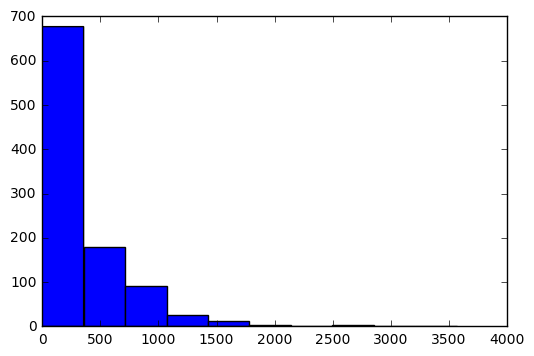

In [31]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

def describe_data(data):
    print('Mean',np.mean(data))
    print('Standard deviation',np.std(data))
    print('Minimum',np.min(data))
    print('Maximum',np.max(data))
    plt.hist(data)

total_minutes =  to_list(total_minutes_by_account.values())
describe_data(total_minutes)




In [32]:
student_with_max_minutes=None
max_minutes = 0
for student,total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes=total_minutes
        studen_with_max_minutes = student
        
max_minutes


3564.7332644989997

In [33]:
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == studen_with_max_minutes:
        print(engagement_record)

{'num_courses_visited': 4, 'has_visited': 1, 'account_key': '163', 'utc_date': datetime.datetime(2015, 7, 9, 0, 0), 'projects_completed': 0, 'lessons_completed': 4, 'total_minutes_visited': 850.519339666}
{'num_courses_visited': 6, 'has_visited': 1, 'account_key': '163', 'utc_date': datetime.datetime(2015, 7, 10, 0, 0), 'projects_completed': 0, 'lessons_completed': 6, 'total_minutes_visited': 872.633923334}
{'num_courses_visited': 2, 'has_visited': 1, 'account_key': '163', 'utc_date': datetime.datetime(2015, 7, 11, 0, 0), 'projects_completed': 0, 'lessons_completed': 6, 'total_minutes_visited': 777.018903666}
{'num_courses_visited': 1, 'has_visited': 1, 'account_key': '163', 'utc_date': datetime.datetime(2015, 7, 12, 0, 0), 'projects_completed': 0, 'lessons_completed': 2, 'total_minutes_visited': 294.568774}
{'num_courses_visited': 3, 'has_visited': 1, 'account_key': '163', 'utc_date': datetime.datetime(2015, 7, 13, 0, 0), 'projects_completed': 0, 'lessons_completed': 1, 'total_minutes

Mean 1.63618090452
Standard deviation 3.00256129983
Minimum 0
Maximum 36


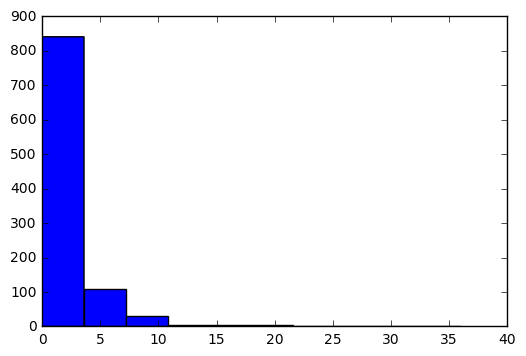

In [34]:
lessons_completed_by_account = sum_grouped_items(engagement_by_account,'lessons_completed')

lessons_completed=  to_list(lessons_completed_by_account.values())
describe_data(lessons_completed)



Mean 2.86733668342
Standard deviation 2.25519800292
Minimum 0
Maximum 7


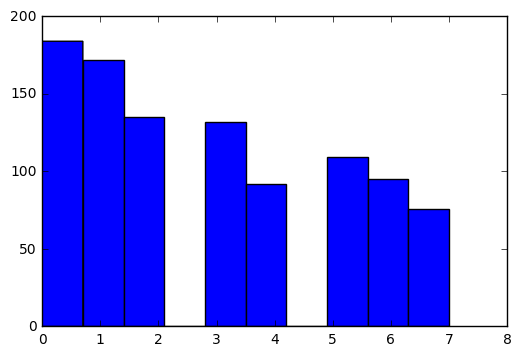

In [35]:
days_visited_by_account = sum_grouped_items(engagement_by_account,'has_visited')

days_visited=  to_list(days_visited_by_account.values())
describe_data(days_visited)

In [36]:
subway_lessons_key = ['746169184','3176718735']

In [37]:
pass_subway_project=set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']
    
    if project in subway_lessons_key and (rating== 'PASSED' or rating== 'DISTINCTION'):
        pass_subway_project.add(submission['account_key'])

len(pass_subway_project)
    

647

In [38]:
passing_engagement=[]
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)
print(len(passing_engagement))
print(len(non_passing_engagement))

4527
2392


In [39]:
passing_engagement_by_account = group_data(passing_engagement,'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement,'account_key')

non-passing students:
Mean 143.326474267
Standard deviation 269.538619011
Minimum 0.0
Maximum 1768.52274933
passing students:
Mean 394.586046484
Standard deviation 448.499519327
Minimum 0.0
Maximum 3564.7332645


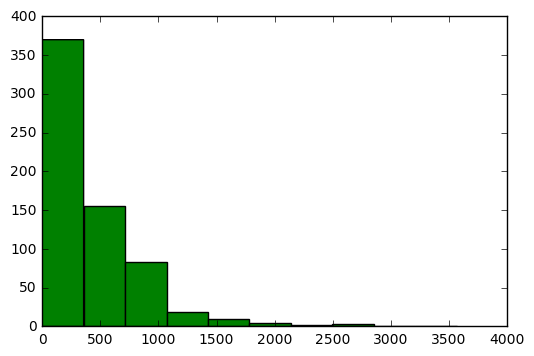

In [40]:
print('non-passing students:')

non_passing_minutes=sum_grouped_items(non_passing_engagement_by_account,'total_minutes_visited')

describe_data(to_list(non_passing_minutes.values()))

print('passing students:')              

passing_minutes=sum_grouped_items(passing_engagement_by_account,'total_minutes_visited')

describe_data(to_list(passing_minutes.values()))

non-passing students:
Mean 0.862068965517
Standard deviation 2.54915994183
Minimum 0
Maximum 27
passing students:
Mean 2.05255023184
Standard deviation 3.14222705558
Minimum 0
Maximum 36


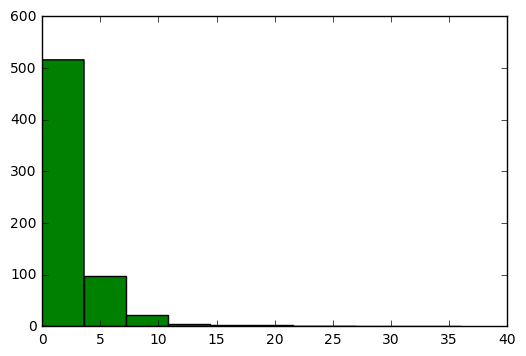

In [41]:
print('non-passing students:')

non_passing_lesson=sum_grouped_items(non_passing_engagement_by_account,'lessons_completed')

describe_data(to_list(non_passing_lesson.values()))

print('passing students:')              

passing_lesson=sum_grouped_items(passing_engagement_by_account,'lessons_completed')

describe_data(to_list(passing_lesson.values()))

non-passing students:
Mean 1.90517241379
Standard deviation 1.90573144136
Minimum 0
Maximum 7
passing students:
Mean 3.38485316847
Standard deviation 2.25882147092
Minimum 0
Maximum 7


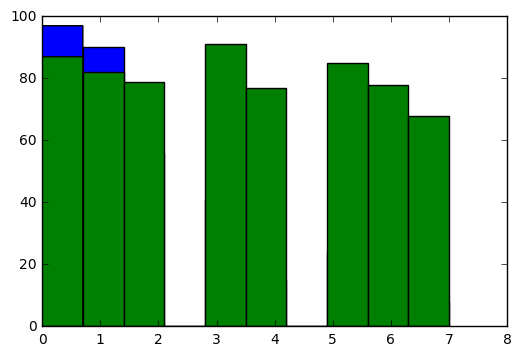

In [42]:
print('non-passing students:')

non_passing_visits=sum_grouped_items(non_passing_engagement_by_account,'has_visited')

describe_data(to_list(non_passing_visits.values()))

print('passing students:')              

passing_visits=sum_grouped_items(passing_engagement_by_account,'has_visited')

describe_data(to_list(passing_visits.values()))

Mean 143.326474267
Standard deviation 269.538619011
Minimum 0.0
Maximum 1768.52274933


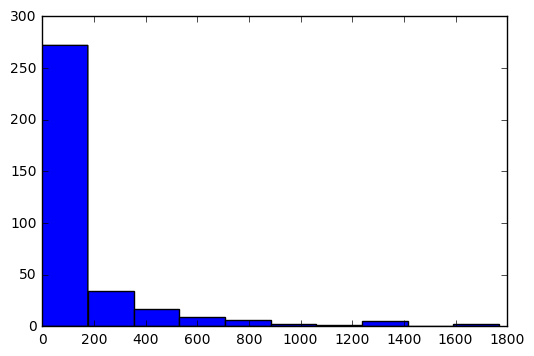

In [43]:
describe_data(to_list(non_passing_minutes.values()))

Mean 394.586046484
Standard deviation 448.499519327
Minimum 0.0
Maximum 3564.7332645


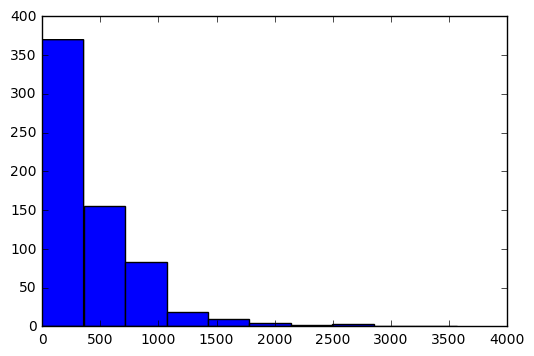

In [44]:
describe_data(to_list(passing_minutes.values()))

Mean 0.862068965517
Standard deviation 2.54915994183
Minimum 0
Maximum 27


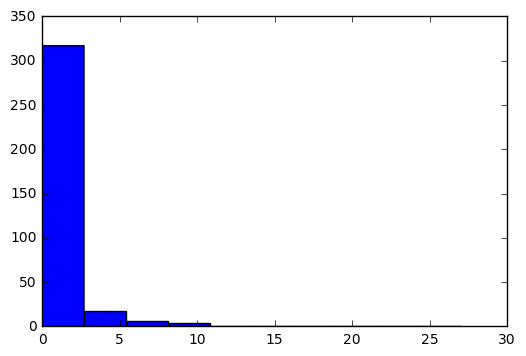

In [45]:
describe_data(to_list(non_passing_lesson.values()))

Mean 2.05255023184
Standard deviation 3.14222705558
Minimum 0
Maximum 36


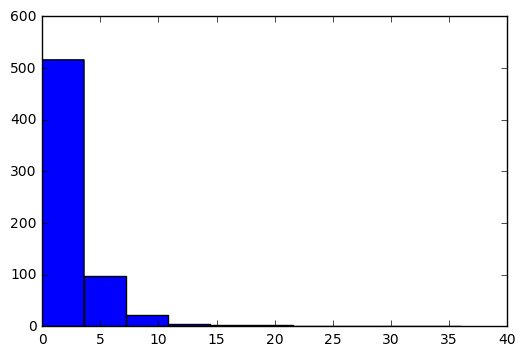

In [46]:
describe_data(to_list(passing_lesson.values()))

Mean 1.90517241379
Standard deviation 1.90573144136
Minimum 0
Maximum 7


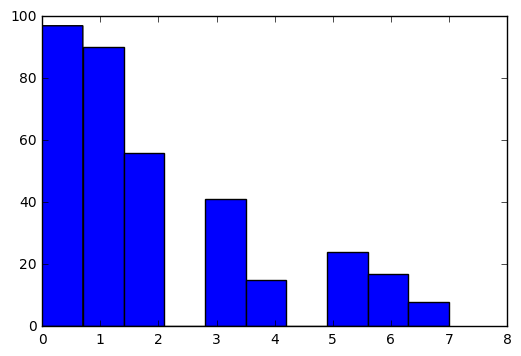

In [47]:
describe_data(to_list(non_passing_visits.values()))

Mean 3.38485316847
Standard deviation 2.25882147092
Minimum 0
Maximum 7


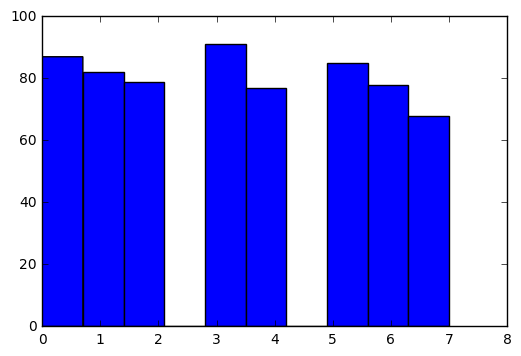

In [48]:
describe_data(to_list(passing_visits.values()))